In [18]:
# Imports & Settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from current directory
env_path = Path('.env')
load_dotenv(env_path)

True

In [19]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

# print(f"Data file path: {path}")

In [20]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

,Date,Profit_pct_100
0,2023-04-17,0.05
1,2023-04-18,-0.00
2,2023-04-19,-0.01
3,2023-04-20,-0.00
4,2023-04-21,0.00


In [21]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            600 non-null    object 
 1   Profit_pct_100  600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [22]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'Profit (%)'}, inplace=True)

# columns order
cols = ['Date', 'Profit (%)']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,Profit (%)
Date,
2023-04-17,0.05
2023-04-18,-0.00
2023-04-19,-0.01
2023-04-20,-0.00
2023-04-21,0.00


In [23]:
# daily_returns are a series as the Profit (%) column
daily_returns = df['Profit (%)']

daily_returns.head()

Date
2023-04-17    0.05
2023-04-18   -0.00
2023-04-19   -0.01
2023-04-20   -0.00
2023-04-21    0.00
Name: Profit (%), dtype: float64

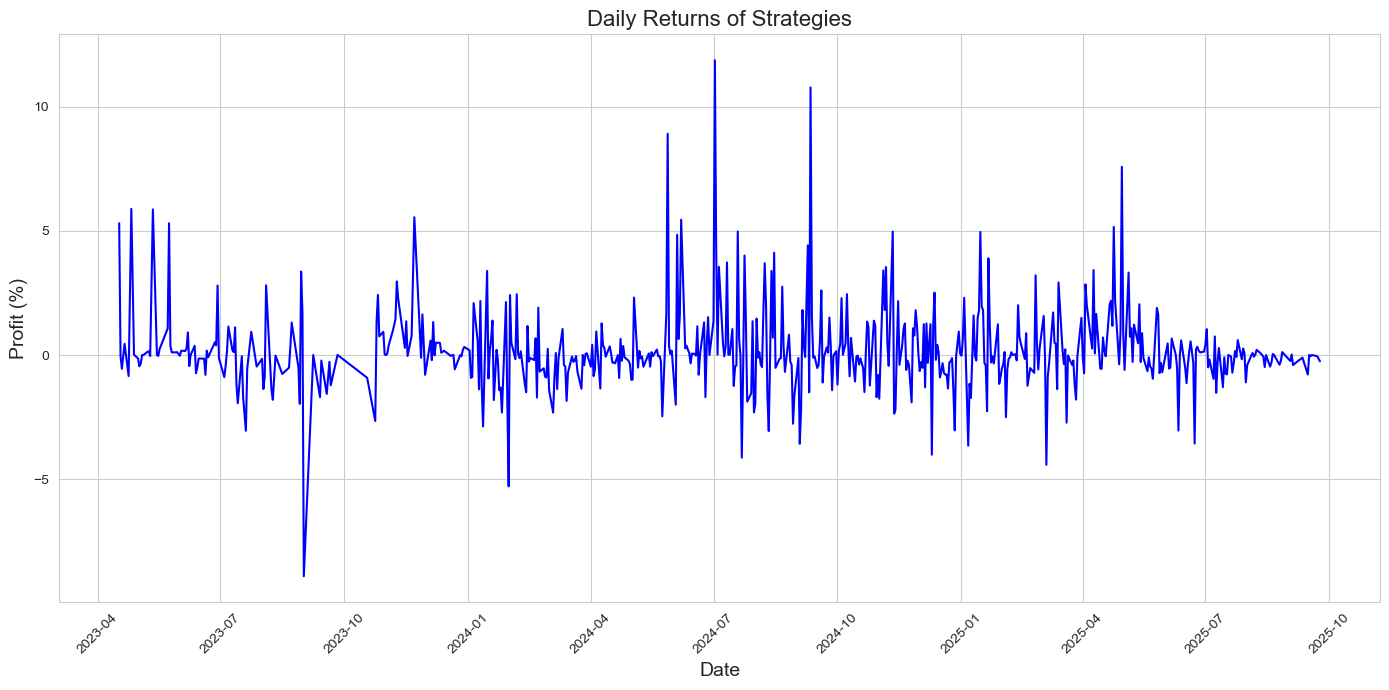

In [24]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Montecarlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations

forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

initial_investment = 100000  # Initial investment amount

# Initilize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future path
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(simulations)

[[ 99547.15   99471.88   98169.01  ... 120433.08  120638.02  123151.97 ]
 [100394.94  101052.14  101204.01  ... 222001.84  221501.37  223676.35 ]
 [ 97685.34   97432.82   97434.37  ... 199096.775 199262.475 198739.235]
 ...
 [ 99961.36   98544.06   98490.9   ...  97622.     99275.1   100500.04 ]
 [102183.58  101905.17  101837.06  ... 191963.475 191963.4   193600.56 ]
 [100351.64  100299.04  100369.56  ... 146492.64  145256.06  145371.685]]


In [26]:
type(simulations)

numpy.ndarray

In [27]:
simulations.shape

(1000, 365)

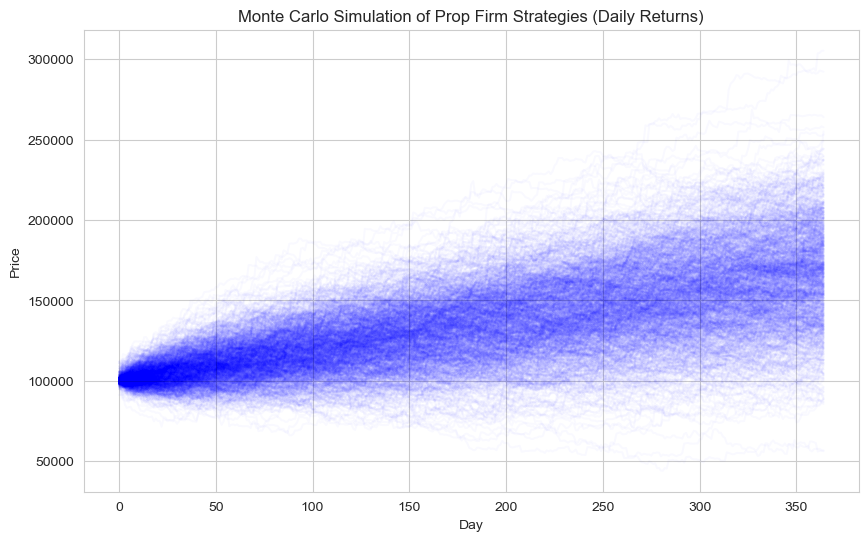

In [28]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Prop Firm Strategies (Daily Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [29]:
# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.0018262055833333356
Volatility: 0.016842312937652912


In [30]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[199428.43781691 272259.91886302 134609.91856507 121727.09471048
 112679.30011142 266579.7953658  216733.02704414 205454.35625974
 220608.56339154 317311.21142524 172026.47657752 318297.28097163
 298210.4429041   78112.6469074  152791.9405464  210628.58683657
 133904.01085402 322043.83815758 135757.01525409 195290.4085021
 164943.35862914 141963.21272326 184395.17567912 164994.80048313
 115750.84562222 204465.96444499 144087.16434871  85778.81121955
 181565.37191264 184896.31275788 278673.09524328 172089.67944663
 259134.92160484 338407.07410402 172761.43752216 192037.54382033
 165216.09673995 193958.80957991  98385.61085186 269364.98846116
 122584.86469395 233552.86773127 369438.58287804 148230.43694694
 179461.67749852 178647.66822802 145393.88198868 163762.83571272
 184491.85479432 190072.37903946 235224.64597811 167985.16278295
 212175.61168466 261820.02804516 143559.77440471 151252.77956348
 167181.28773201 183309.62688086 166041.78150687 260365.51286027
 167854.40250073 186792.84

In [31]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $-10,616.97
Expected Tail Loss (Conditional VaR): $4,177.81


In [32]:
desired_return = 0.10  # Desired return

num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 95.00%


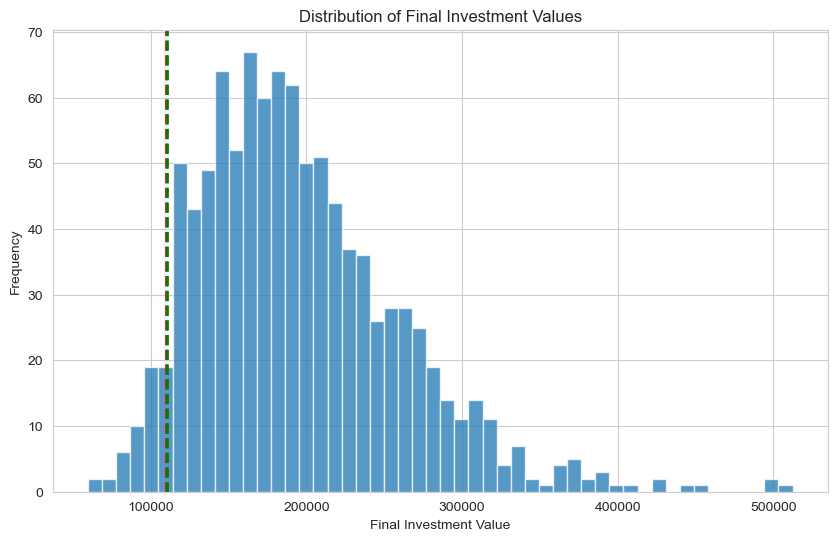

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75)
plt.axvline(
    initial_investment * (1 + desired_return),
    color="r",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2)
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.show()